# Declaring libraries

In [13]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Image Preprocessing

Found 29469 images belonging to 21 classes.
Found 7356 images belonging to 21 classes.


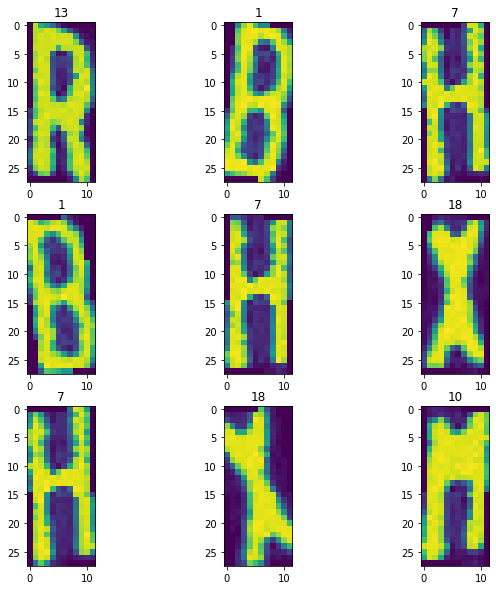

In [14]:
ds = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2,
    rotation_range=10,
    fill_mode='constant',
    cval=0
)

train_ds = ds.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=128,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

validation_ds = ds.flow_from_directory(
    "../charLabel", 
    target_size=(28,12), 
    batch_size=128,
    subset='validation',
    color_mode='grayscale',
    class_mode='sparse'
)

input_shape = train_ds[0][0][0].shape

fig, axs = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (10,10)

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(validation_ds[3][0][i + j])
        axs[i, j].set_title(int(validation_ds[3][1][i + j]))

# Model Definition

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28,12,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='elu', 
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='elu', 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(),
                       'accuracy'])

# Model Summary

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 12, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 12, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 12, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 12, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 6, 32)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 6, 64)         18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 6, 64)        

# Callback class and Model Checkpoint for Saving

In [17]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') >= 0.999 and logs.get('accuracy') >= 0.999) :
            print('\nReached 99% accuracy so stopping training')
            self.model.stop_training = True

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel2\\version4.hdf5',
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

# Start the training

In [18]:
callback = stopCallback()

history = model.fit(train_ds, 
                    epochs=1000, 
                    callbacks=[callback, model_checkpoint_callback], 
                    validation_data=validation_ds)

Epoch 1/1000
231/231 [==============================] - 25s 107ms/step - loss: 3.2723 - sparse_categorical_crossentropy: 3.0677 - accuracy: 0.1570 - val_loss: 3.3855 - val_sparse_categorical_crossentropy: 3.1803 - val_accuracy: 0.1411
Epoch 2/1000
231/231 [==============================] - 26s 113ms/step - loss: 2.5783 - sparse_categorical_crossentropy: 2.3753 - accuracy: 0.3271 - val_loss: 3.3244 - val_sparse_categorical_crossentropy: 3.1214 - val_accuracy: 0.1949
Epoch 3/1000
231/231 [==============================] - 33s 142ms/step - loss: 2.1700 - sparse_categorical_crossentropy: 1.9671 - accuracy: 0.4796 - val_loss: 3.0294 - val_sparse_categorical_crossentropy: 2.8234 - val_accuracy: 0.2920
Epoch 4/1000
231/231 [==============================] - 51s 222ms/step - loss: 1.8374 - sparse_categorical_crossentropy: 1.6346 - accuracy: 0.6070 - val_loss: 2.8604 - val_sparse_categorical_crossentropy: 2.6600 - val_accuracy: 0.4114
Epoch 5/1000
231/231 [==============================] - 23s 

KeyboardInterrupt: 

# Plot the Losses Graph and Accuracy Graph

In [ ]:
H = {}
H['number'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='sparse_categorical_crossentropy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 3)

NameError: name 'history' is not defined

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric='accuracy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 2)